In [440]:
import numpy as np
import random

# Define grid size
GRID_SIZE = 40

# Define starting point and destination
start = (2, 3)
destination = (38, 39)

population_size = 20
chromosome_size = 10

no_of_obstacles = 40
# # Create grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=bool)


In [441]:
# Define obstacles
for x in range(no_of_obstacles):
    x = random.randint(0, 39)
    y = random.randint(0, 39)
    if(grid[(x,y)] != True): # so that duplicate obstacle not occur.
        grid[(x,y)] = True
    else:
        x = x - 1


In [442]:
# Making Chromosomes(population)


chromosomes = []
for x in range(population_size):
    row = []
    for y in range(10):
        if y == 0:
            row.append(start)
            continue
        elif y == 9:
            row.append(destination)
            continue
        x_index = random.randint(0, 39)
        y_index = random.randint(0, 39)
        while (x_index, y_index) in row:
            x_index = random.randint(0, 39)
            y_index = random.randint(0, 39)
        row.append((x_index, y_index))
    chromosomes.append([row, x])


In [443]:
# our fitness formula will be (distance + no. of obstacles) 
#more the value, lesser fit is the chromosome

#Function to calculate the fitness of each chromosome.
def calculateFitness():
    for x in range(population_size):
        fitness = 0
        for y in range(chromosome_size - 1):
            x_dist = abs(chromosomes[x][0][y][0] - chromosomes[x][0][y+1][0])
            y_dist = abs(chromosomes[x][0][y][1] - chromosomes[x][0][y+1][1])
            fitness += x_dist if (x_dist > y_dist) else y_dist
            if grid[chromosomes[x][0][y]] == True:
                fitness += 1
        if grid[chromosomes[x][0][chromosome_size - 1]] == True:
                fitness += 1
        chromosomes[x][1] = fitness
        
calculateFitness()

#code to print fitness of each chromosome
for x in range(population_size):
    print(chromosomes[x][1])
print(type(chromosomes))
    

197
153
211
209
195
196
179
172
173
159
194
125
127
193
236
181
131
145
187
220
<class 'list'>


In [444]:
# Sort chromosomes list in ascending order based on the x value of each chromosome
chromosomes = sorted(chromosomes, key=lambda x: x[1], reverse=True)

# Print the sorted chromosome's fitness values to verify the sorting.
for chromo in chromosomes:
    print(chromo[1])

236
220
211
209
197
196
195
194
193
187
181
179
173
172
159
153
145
131
127
125


In [445]:
#calculating the total fitness
def calculateTotalFitness(ch):
    totalFitness = 0
    for chromo in ch:
        totalFitness += chromo[1]
    return totalFitness

totalFitness = calculateTotalFitness(chromosomes)
print("total fitness", totalFitness)

# def divide(ch):
#     for chromo in ch:
#         chromo[1] = chromo[1]/totalFitness
#     return ch

# chromosomes = divide(chromosomes)

#After dividing, check that total is 1.
# tot = 0.0
# for chromo in chromosomes:
#     tot += chromo[1]

# #printing fitnesses
# for chromo in chromosomes:
#     print(chromo[1])

# print(f"tot = {tot}")

total fitness 3583


In [446]:
#Now, do linear rank selection using the formula m, m(1-m) . . . 
def assignMValues(ch):
    ch[0][1] = m = ch[0][1]/totalFitness
    x = m
# Iterate through the chromosomes list starting from the 1st index
    for i, chromo in enumerate(ch[1:], start = 1):
        x = x * (1-m)
        chromo[1] = x
    return ch

chromosomes = assignMValues(chromosomes)

for chromo in chromosomes:
    print(chromo[1])

total = 0.0
for chromo in chromosomes:
    total += chromo[1]
print(f"total = {total}")

t = 0
for chromo in chromosomes:
    t += round((chromo[1]/total)*100)
    
print(f"t = {t}")

0.06586659224113871
0.061528184267678275
0.05747553244318147
0.0536898149839041
0.05015344983285711
0.04685001300322991
0.04376416230025412
0.04088156606724827
0.038188836624917656
0.035673468094780746
0.03332377831795455
0.03112885459955174
0.02907850302670937
0.027163201124866386
0.025374053632410774
0.02370275118829999
0.02214153174078707
0.02068314449802242
0.019320816253106627
0.01804821992719729
total = 0.7440364741680966
t = 99


In [447]:
# for chromo in chromosomes:
#     chromo[1] = 1 - chromo[1]

for chromo in chromosomes:
    print(chromo[1])

total = 0.0
for chromo in chromosomes:
    total += chromo[1]
print(f"total = {total}")

print("percentage of each chromosome")
t = 0
def assignCountToEachChromosome():
    global t
    for chromo in chromosomes:
        a = round((chromo[1]/total)*100)
        chromo[1] = a
        t += a
        print(a)


assignCountToEachChromosome()

print(f"t = {t}")

#swap value
def swapValues():
    i = population_size - 1
    print("i = ", i)
    for x in range(round(population_size/2)):
        temp = chromosomes[x][1]
        chromosomes[x][1] = chromosomes[i][1]
        chromosomes[i][1] = temp
        i = i - 1

swapValues()


print("After swapping")
for chromo in chromosomes:
    print(chromo[1])

0.06586659224113871
0.061528184267678275
0.05747553244318147
0.0536898149839041
0.05015344983285711
0.04685001300322991
0.04376416230025412
0.04088156606724827
0.038188836624917656
0.035673468094780746
0.03332377831795455
0.03112885459955174
0.02907850302670937
0.027163201124866386
0.025374053632410774
0.02370275118829999
0.02214153174078707
0.02068314449802242
0.019320816253106627
0.01804821992719729
total = 0.7440364741680966
percentage of each chromosome
9
8
8
7
7
6
6
5
5
5
4
4
4
4
3
3
3
3
3
2
t = 99
i =  19
After swapping
2
3
3
3
3
3
4
4
4
4
5
5
5
6
6
7
7
8
8
9


In [448]:
#Distribute in array according to given values(here array is a roulette wheel)

wheel_arr = []
def fillWheelArr():
    global wheel_arr
    wheel_arr.clear()
    for x in range(population_size):
        i = 0
        while(i < chromosomes[x][1]):
            wheel_arr.append(x)
            i = i + 1

fillWheelArr()
print(f"Printing the roulette wheel array, {wheel_arr}")

Printing the roulette wheel array, [0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19]


In [449]:
#Now do random selection according to the linear rank distribution to generate childs.
def generateChilds():
    random1 = random.randint(0, len(wheel_arr)-1)
    random2 = random.randint(0, len(wheel_arr)-1)

    #do selection of parents using random1 & 2.
    parent1 = chromosomes[wheel_arr[random1]][0]
    parent2 = chromosomes[wheel_arr[random2]][0]
    print(f"parent 1 is {parent1}")
    print(f"parent 2 is {parent2}")

    #random cut generate
    cut = random.randint(0, chromosome_size - 2)
    print(f"Cut : {cut}")
    child1 = []
    child2 = []

    for x in range(cut):
        child1.append(parent1[x])
        child2.append(parent2[x])

    for x in range(cut, chromosome_size):
        child1.append(parent2[x])
        child2.append(parent1[x])

    chromosomes.append([child1, 1])
    chromosomes.append([child2, 2])

generateChilds()

print(len(chromosomes))
# print(f"Child 1 is {child1}")
# print(f"Child 2 is {child2}")

parent 1 is [(2, 3), (18, 16), (7, 25), (30, 9), (30, 13), (36, 5), (29, 5), (12, 3), (14, 3), (38, 39)]
parent 2 is [(2, 3), (32, 39), (21, 6), (25, 15), (33, 22), (21, 20), (11, 6), (32, 34), (36, 16), (38, 39)]
Cut : 8
22


In [450]:
def removeExtraChromosomes():
    for x in range(2):
        chromosomes.pop(0)

In [451]:
i = 0
while i < 500: 
    calculateFitness()
    chromosomes = sorted(chromosomes, key=lambda x: x[1], reverse=True)
    removeExtraChromosomes()
    totalFitness = calculateTotalFitness(chromosomes)
    chromosomes = assignMValues(chromosomes)
    assignCountToEachChromosome()
    swapValues()
    if (i+1) < 100:
        fillWheelArr()
        generateChilds()
    i = i + 1
print(chromosomes[population_size - 1][0])
print(len(chromosomes))

9
8
8
7
7
6
6
6
5
5
5
4
4
4
3
3
3
3
3
2
i =  19
parent 1 is [(2, 3), (32, 39), (21, 6), (25, 15), (33, 22), (21, 20), (11, 6), (32, 34), (36, 16), (38, 39)]
parent 2 is [(2, 3), (10, 39), (5, 22), (15, 28), (19, 35), (4, 13), (5, 15), (35, 10), (35, 14), (38, 39)]
Cut : 2
9
9
8
7
7
6
6
6
5
5
5
4
4
4
3
3
3
3
3
2
i =  19
parent 1 is [(2, 3), (18, 16), (7, 25), (30, 9), (30, 13), (36, 5), (29, 5), (12, 3), (14, 3), (38, 39)]
parent 2 is [(2, 3), (33, 6), (6, 33), (23, 21), (32, 17), (2, 38), (20, 26), (33, 0), (33, 32), (38, 39)]
Cut : 6
9
8
8
7
7
6
6
5
5
5
4
4
4
4
3
3
3
3
3
2
i =  19
parent 1 is [(2, 3), (18, 16), (7, 25), (30, 9), (30, 13), (36, 5), (20, 26), (33, 0), (33, 32), (38, 39)]
parent 2 is [(2, 3), (7, 31), (28, 28), (18, 29), (29, 32), (34, 31), (22, 7), (37, 37), (30, 33), (38, 39)]
Cut : 7
9
8
8
7
7
6
6
6
5
5
4
4
4
4
3
3
3
3
3
2
i =  19
parent 1 is [(2, 3), (36, 21), (23, 20), (28, 10), (23, 33), (8, 13), (39, 9), (27, 29), (22, 30), (38, 39)]
parent 2 is [(2, 3), (14, 29),

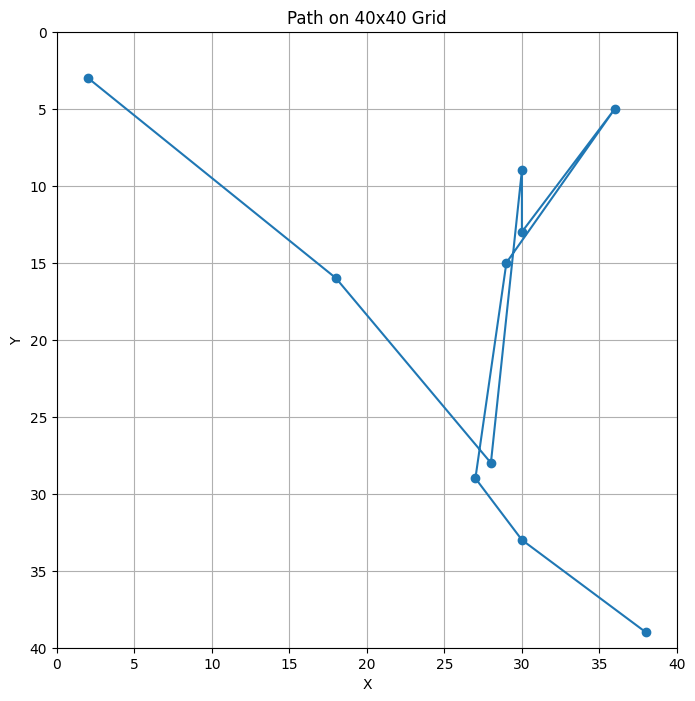

In [452]:
import matplotlib.pyplot as plt

# Assuming chromosomes[population_size - 1][0] contains the path coordinates
path_coordinates = chromosomes[population_size - 1][0]

# Extract x and y coordinates from the path
x_coordinates = [coord[0] for coord in path_coordinates]
y_coordinates = [coord[1] for coord in path_coordinates]

# Plot the path on a grid of size 40x40
plt.figure(figsize=(8, 8))
plt.plot(x_coordinates, y_coordinates, marker='o', linestyle='-')
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.gca().invert_yaxis()  # Invert y-axis to match grid convention
plt.grid(True)
plt.title('Path on 40x40 Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
